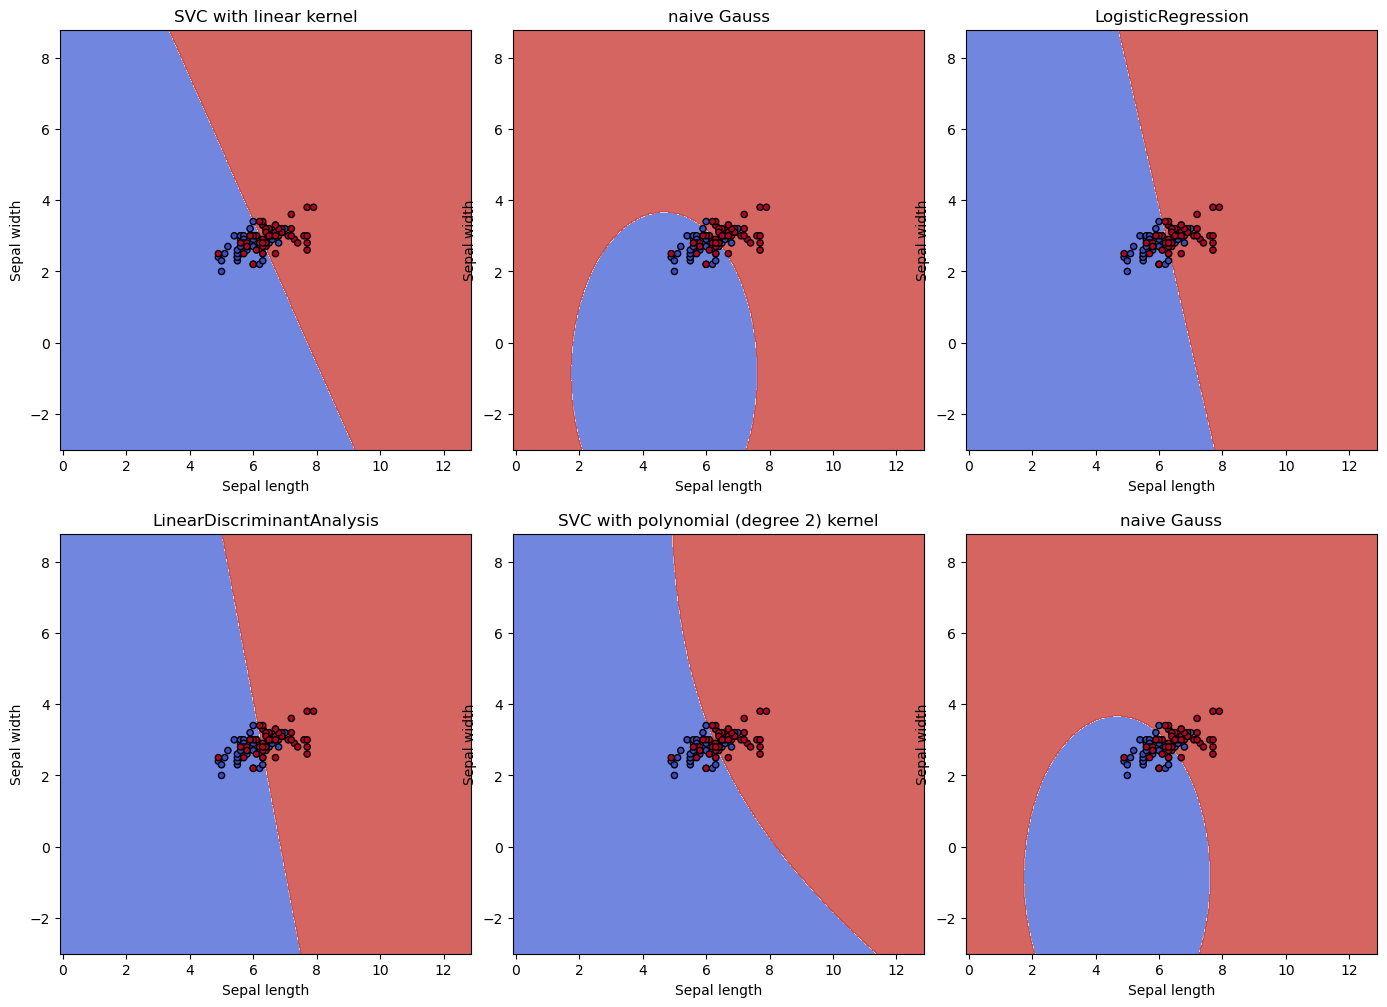

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

def make_meshgrid(x, y, h=.02):
    d = 5
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
#X = iris.data[:, :2]
#y = iris.target

X = iris.data[iris.target!=0, :2]
y = iris.target[iris.target!=0]

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = [svm.SVC(kernel='linear', C=C),
          #svm.LinearSVC(C=C, max_iter=10000),
          GaussianNB(),
          LogisticRegression(random_state=0),
          #svm.SVC(kernel='rbf', gamma=0.7, C=C),
          LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),
          GaussianNB()]
#models = [clf.fit(X, y) for clf in models]

for clf in models:
  clf.fit(X, y)

# title for the plots
titles = ['SVC with linear kernel',
          #'LinearSVC (linear kernel)',
          'naive Gauss',
          'LogisticRegression',
          #'SVC with RBF kernel',
          'LinearDiscriminantAnalysis',
          'SVC with polynomial (degree 2) kernel',
          'naive Gauss']

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 3,figsize=(17,12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    #ax.set_xticks(())
    #ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [ ]:
xx, yy = np.meshgrid(np.arange(3)+1,np.arange(3)+1)
xx

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [ ]:
xx.ravel()

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [ ]:
yy
np.c_[xx.ravel(), yy.ravel()]

array([[1, 1],
       [2, 1],
       [3, 1],
       [1, 2],
       [2, 2],
       [3, 2],
       [1, 3],
       [2, 3],
       [3, 3]])

In [ ]:
a, b = xx.shape
a

590

In [ ]:
[x*x for x in range(5)]

[0, 1, 4, 9, 16]

In [ ]:
list(range(5))

[0, 1, 2, 3, 4]

In [ ]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
import pandas as pd

df = pd.DataFrame(iris.data)
df['target'] = iris.target
df

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
st = df.groupby('target').agg(['mean','std']).T
st

target         0         1         2
0 mean  5.006000  5.936000  6.588000
  std   0.352490  0.516171  0.635880
1 mean  3.418000  2.770000  2.974000
  std   0.381024  0.313798  0.322497
2 mean  1.464000  4.260000  5.552000
  std   0.173511  0.469911  0.551895
3 mean  0.244000  1.326000  2.026000
  std   0.107210  0.197753  0.274650

In [ ]:
st.loc[(0,'mean')]

target
0    5.006
1    5.936
2    6.588
Name: (0, mean), dtype: float64

In [ ]:
from scipy.stats import norm

def cond_prob(x,mean1,std1,mean2,std2):
    p1 = norm.pdf(x,mean1,std1)
    p2 = norm.pdf(x,mean2,std2)
    return p1/(p1+p2)


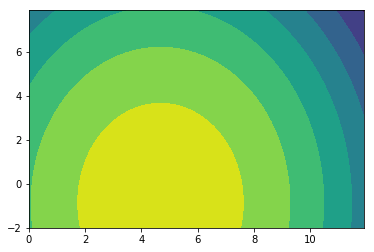

In [ ]:
xx0, xx1 = np.meshgrid(np.arange(0, 12, 0.1),np.arange(-2, 8, 0.1))
pp0 = cond_prob(xx0,st.loc[(0,'mean'),1],st.loc[(0,'std'),1],st.loc[(0,'mean'),2],st.loc[(0,'std'),2])
pp1 = cond_prob(xx1,st.loc[(1,'mean'),1],st.loc[(1,'std'),1],st.loc[(1,'mean'),2],st.loc[(1,'std'),2])

zz = np.log(pp0) - np.log(1.0-pp0) + np.log(pp1) - np.log(1.0-pp1)
plt.contourf(xx0, xx1, zz)